<a href="https://colab.research.google.com/github/bollimuntha-shreya/Election-Classification/blob/main/Elections_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataframe


In [1]:
import pandas as pd
import io
import glob
import numpy as np
url = 'https://raw.githubusercontent.com/bollimuntha-shreya/Election-Classification/main/All_States_GE.csv'
data = pd.read_csv(url)




<ipython-input-1-8b469cbd98fe>:6: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


#Data Preprocessing

In [2]:

data_pre = data.copy()
data_pre = data_pre.loc[(data_pre['Candidate'] != 'NOTA') & (data_pre['Sex'] != 'NOTA')]
data_pre['Year'] = pd.to_datetime(data_pre['Year'], format='%Y')
data_pre = data_pre.loc[(data_pre['Year'] == '2019')]
# print(data_pre.head(100))


<ipython-input-2-911c9a719871>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['Year'] = pd.to_datetime(data_pre['Year'], format='%Y')


# Insight 1 : Gender Distribution



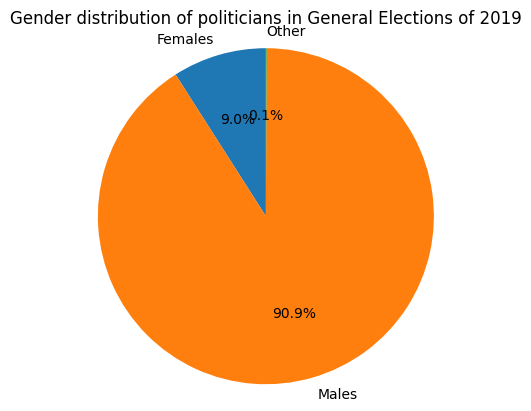

In [3]:
male_politician = data_pre[(data_pre['Sex']=='M') | (data_pre['Sex']=='MALE') ]
female_politician = data_pre[(data_pre['Sex']=='F') | (data_pre['Sex']=='FEMALE')]
other_politician = data_pre[data_pre['Sex']=='O']

import matplotlib.pyplot as plt

labels = ['Females', 'Males','Other']

sizes = [female_politician.shape[0], male_politician.shape[0], other_politician.shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender distribution of politicians in General Elections of 2019')
plt.show()




#Insight 2 : Party Type


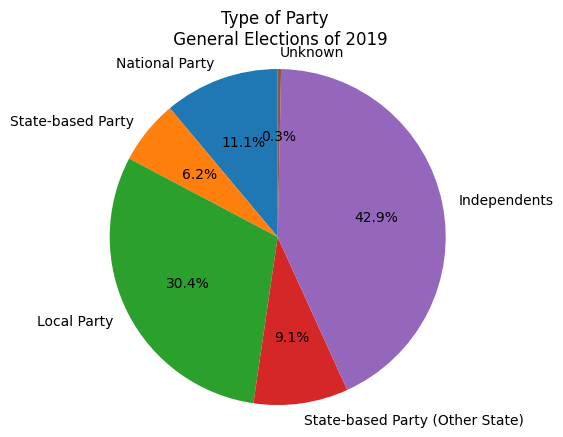

In [4]:
NP = data_pre[data_pre['Party_Type_TCPD']=='National Party']
SP = data_pre[data_pre['Party_Type_TCPD']=='State-based Party']
LP = data_pre[data_pre['Party_Type_TCPD']=='Local Party']
OP = data_pre[data_pre['Party_Type_TCPD']=='State-based Party (Other State)']
I = data_pre[data_pre['Party_Type_TCPD']=='Independents']
K = data_pre[(data_pre['Party_Type_TCPD'] != 'National Party') & (data_pre['Party_Type_TCPD'] != 'State-based Party') & (data_pre['Party_Type_TCPD'] != 'Local Party') & (data_pre['Party_Type_TCPD'] != 'State-based Party (Other State)') & (data_pre['Party_Type_TCPD'] != 'Independents')]



import matplotlib.pyplot as plt

labels = ['National Party', 'State-based Party', 'Local Party','State-based Party (Other State)','Independents', 'Unknown']

sizes = [NP.shape[0], SP.shape[0], LP.shape[0], OP.shape[0], I.shape[0], K.shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Type of Party \n General Elections of 2019')
plt.show()


# print(K)


#Insight 3: Education Level

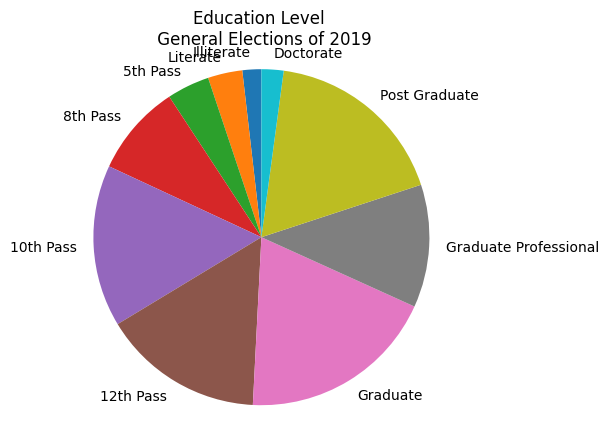

In [5]:
Illit = data_pre[data_pre['MyNeta_education']=='Illiterate']
Lit = data_pre[data_pre['MyNeta_education']=='Literate']
five = data_pre[data_pre['MyNeta_education']=='5th Pass']
eight = data_pre[data_pre['MyNeta_education']=='8th Pass']
ten = data_pre[data_pre['MyNeta_education']=='10th Pass']
twelve = data_pre[data_pre['MyNeta_education']=='12th Pass']
grad = data_pre[data_pre['MyNeta_education']=='Graduate']
grad_prof = data_pre[data_pre['MyNeta_education']=='Graduate Professional']
post = data_pre[data_pre['MyNeta_education']=='Post Graduate']
doc = data_pre[data_pre['MyNeta_education']=='Doctorate']

import matplotlib.pyplot as plt

labels = ['Illiterate', 'Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 'Graduate', 'Graduate Professional', 'Post Graduate', 'Doctorate']

sizes = [Illit.shape[0], Lit.shape[0], five.shape[0], eight.shape[0], ten.shape[0], twelve.shape[0], grad.shape[0], grad_prof.shape[0], post.shape[0], doc.shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Education Level \n General Elections of 2019')
plt.show()

